# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/Users/olesialev/Downloads/data:/yulu_bike_sharing_dataset.csv')

In [4]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки з індексу datetime
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [15]:
monthly_count = df['count'].resample('ME').mean()

print(monthly_count)

datetime
2011-01-31     54.645012
2011-02-28     73.641256
2011-03-31     86.849776
2011-04-30    111.026374
2011-05-31    174.809211
2011-06-30    196.877193
2011-07-31    203.614035
2011-08-31    182.666667
2011-09-30    174.622517
2011-10-31    174.773626
2011-11-30    155.458333
2011-12-31    134.173246
2012-01-31    124.353201
2012-02-29    145.646154
2012-03-31    208.276923
2012-04-30    257.455947
2012-05-31    264.109649
2012-06-30    287.186404
2012-07-31    267.037281
2012-08-31    285.570175
2012-09-30    292.598684
2012-10-31    280.508772
2012-11-30    231.980220
2012-12-31    217.054825
Freq: ME, Name: count, dtype: float64


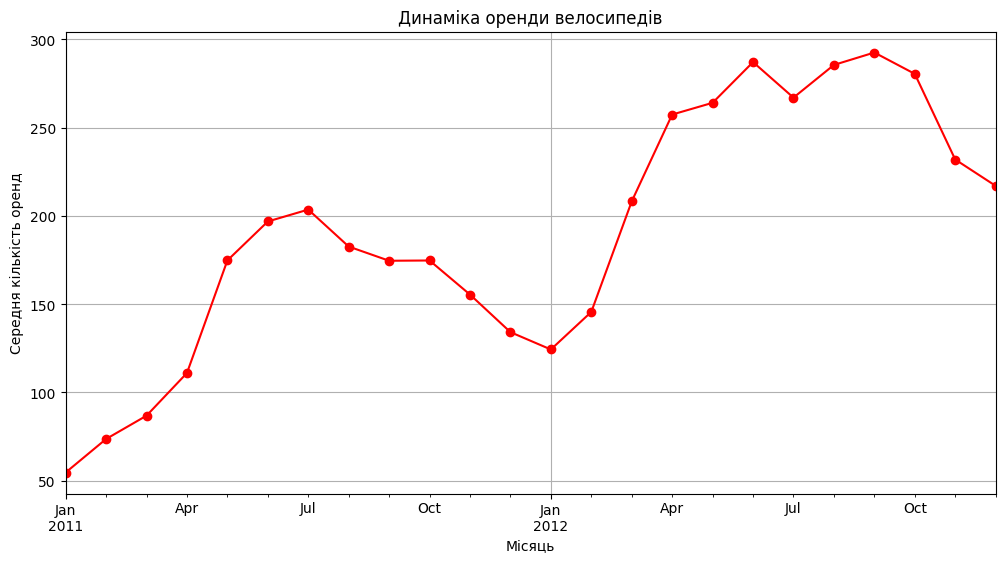

In [18]:
monthly_count.plot( figsize=(12, 6), title='Динаміка оренди велосипедів', grid=True, marker='o', color='red'
    )
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.show()

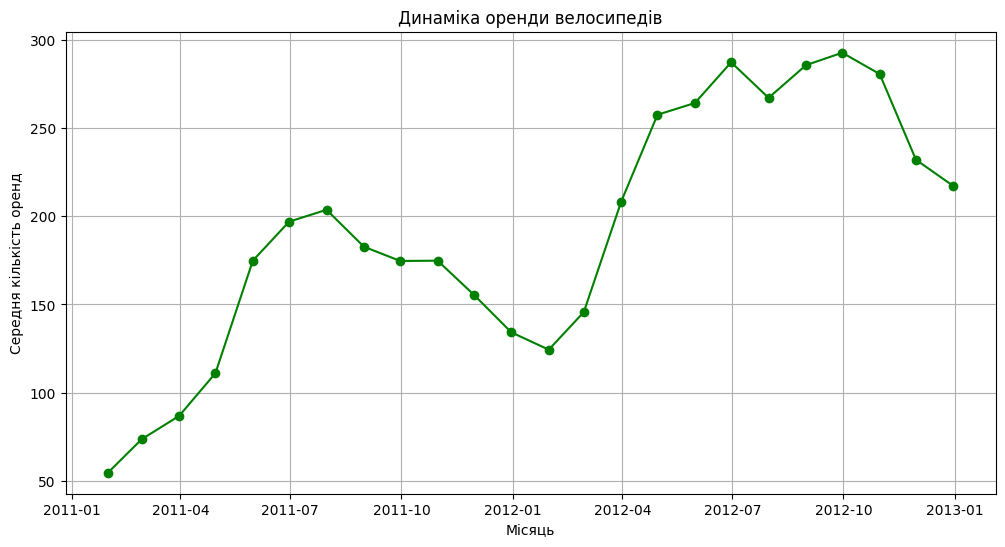

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_count.index,
    monthly_count.values,
    marker='o',
    color='green')
plt.title('Динаміка оренди велосипедів')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True);

Візуально графіки майже одинакові. Лише розмітка осі Х відрізняється у двох графіках. Pandas все ж таки швидше у використанні та менше коду до написання. 

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [20]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

In [27]:
total_sales=pd.DataFrame({
    'Продажі за перший тиждень': sales_week1,
    'Продажі за другий тиждень': sales_week2
}, index=days)
print(total_sales)

   Продажі за перший тиждень  Продажі за другий тиждень
1                       1349                       1321
2                       1562                       1263
3                       1600                       1162
4                       1606                       1406
5                       1510                       1421
6                        959                       1248
7                        822                       1204


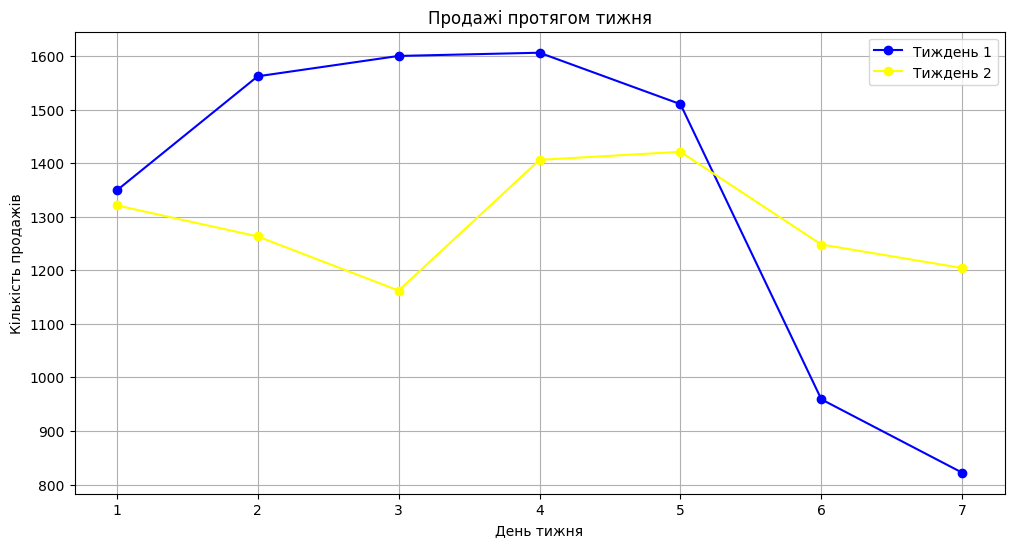

In [32]:
plt.figure(figsize=(12, 6))

plt.plot(days, sales_week1, marker='o', label='Тиждень 1', color='blue')
plt.plot(days, sales_week2, marker='o', label='Тиждень 2', color='yellow')

plt.title('Продажі протягом тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість продажів')
plt.legend()
plt.grid(True)

plt.show()


1. у другий тиждень.
2. можна обчислити стандартне відхилення через np.std, менше стандартне відхилення вказуватиме на стабільніші продажі.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

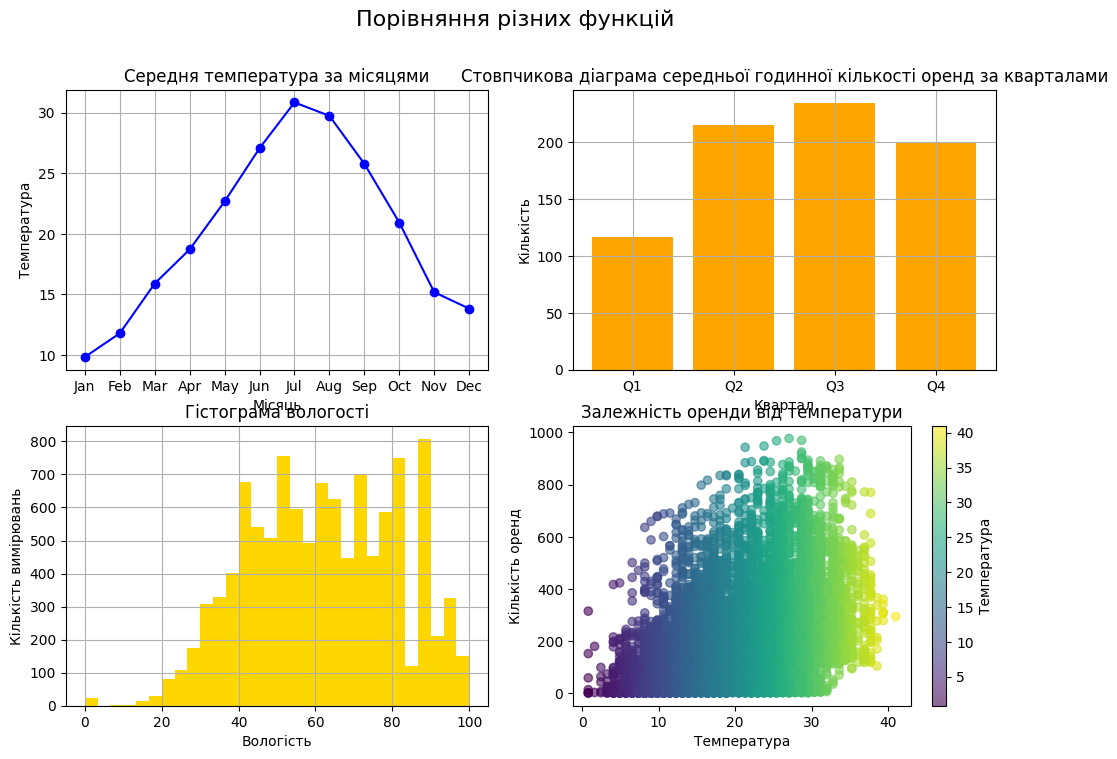

In [70]:
monthly_temp = df.groupby(df.index.month)['temp'].mean()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
# Лінійний графік середньої температури помісячно.
plt.plot(
    monthly_temp.index,
    monthly_temp.values,
    marker='o',
    color='blue'
)
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan','Feb','Mar','Apr','May','Jun',
            'Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.title('Середня температура за місяцями')
plt.xlabel('Місяць')
plt.ylabel('Температура')
plt.grid(True)

quarterly_count= df.groupby(df.index.quarter)['count'].mean()
# Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
plt.subplot(2, 2, 2)
plt.bar(['Q1', 'Q2', 'Q3', 'Q4'],
    quarterly_count.values, color='orange')
plt.title('Стовпчикова діаграма середньої годинної кількості оренд за кварталами')
plt.xlabel('Квартал')
plt.ylabel('Кількість')
plt.grid(True)

#Гістограма вологості за всіма погодинними вимірами.
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=30, color='gold')
plt.title('Гістограма вологості')
plt.xlabel('Вологість')
plt.ylabel('Кількість вимірювань')
plt.grid(True)

#Scatter plot температури vs кількості оренд.
plt.subplot(2, 2, 4)
plt.scatter(
    x=df['temp'],        
    y=df['count'],       
    c=df['temp'],      
    cmap='viridis',   
    alpha=0.6          
)
plt.title('Залежність оренди від температури')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.colorbar(label='Температура')  

plt.suptitle('Порівняння різних функцій', fontsize=16)
plt.show()



## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

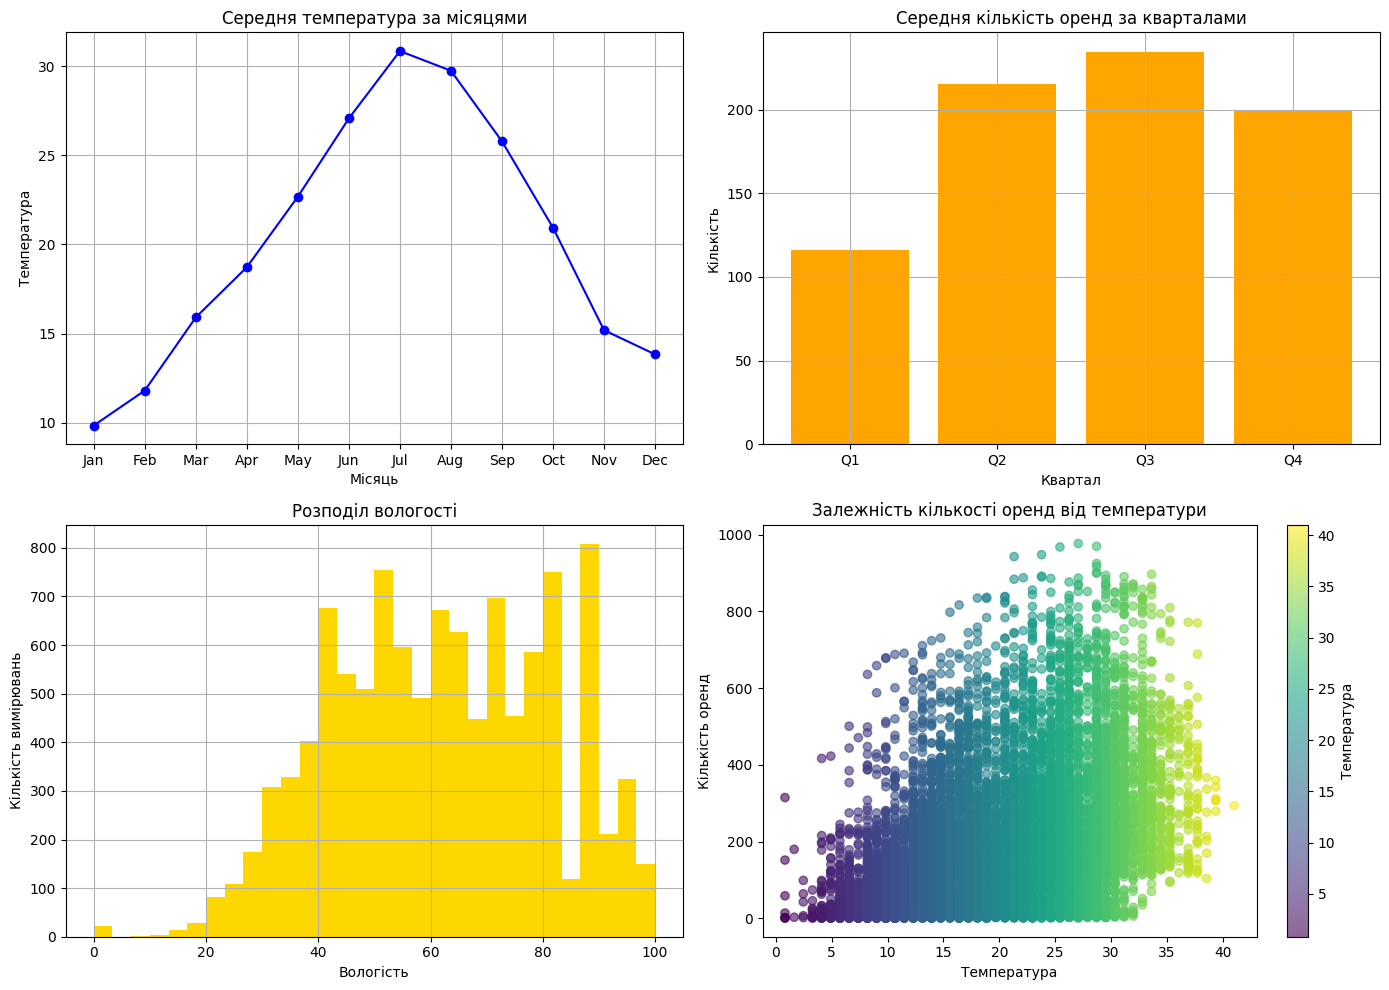

In [75]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Лінійний графік середньої температури помісячно.
monthly_temp = df.groupby(df.index.month)['temp'].mean()
ax[0, 0].plot(
    monthly_temp.index,
    monthly_temp.values,
    marker='o',
    color='blue'
)
ax[0, 0].set_xticks(range(1, 13))
ax[0, 0].set_xticklabels(
    ['Jan','Feb','Mar','Apr','May','Jun',
     'Jul','Aug','Sep','Oct','Nov','Dec'])
ax[0, 0].set_title('Середня температура за місяцями')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура')
ax[0, 0].grid(True)

# Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
quarterly_count = df.groupby(df.index.quarter)['count'].mean()
ax[0, 1].bar(
    ['Q1', 'Q2', 'Q3', 'Q4'],
    quarterly_count.values,
    color='orange'
)
ax[0, 1].set_title('Середня кількість оренд за кварталами')
ax[0, 1].set_xlabel('Квартал')
ax[0, 1].set_ylabel('Кількість')
ax[0, 1].grid(True)

#Гістограма вологості за всіма погодинними вимірами.
ax[1, 0].hist(
    df['humidity'],
    bins=30,
    color='gold'
)
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Кількість вимірювань')
ax[1, 0].grid(True)

#Scatter plot температури vs кількості оренд.
scatter = ax[1, 1].scatter(
    df['temp'],
    df['count'],
    c=df['temp'],
    cmap='viridis',
    alpha=0.6
)
ax[1, 1].set_title('Залежність кількості оренд від температури')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')

fig.colorbar(scatter, ax=ax[1, 1], label='Температура')

plt.tight_layout()
plt.show()

plt.subplot() зручний для швидких графіків, у той час як plt.subplots() дає можливість працювати з великою кількістю графіків, налаштуванням стилів, додаванням легенд.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [76]:
monthly_stats = df['count'].resample('ME').agg(['mean', 'max', 'min'])
monthly_stats

,mean,max,min
datetime,,,
2011-01-31,54.645012,219,1
2011-02-28,73.641256,327,1
2011-03-31,86.849776,332,1
2011-04-30,111.026374,452,1
2011-05-31,174.809211,611,1
2011-06-30,196.877193,638,1
2011-07-31,203.614035,596,1
2011-08-31,182.666667,600,1
2011-09-30,174.622517,628,1


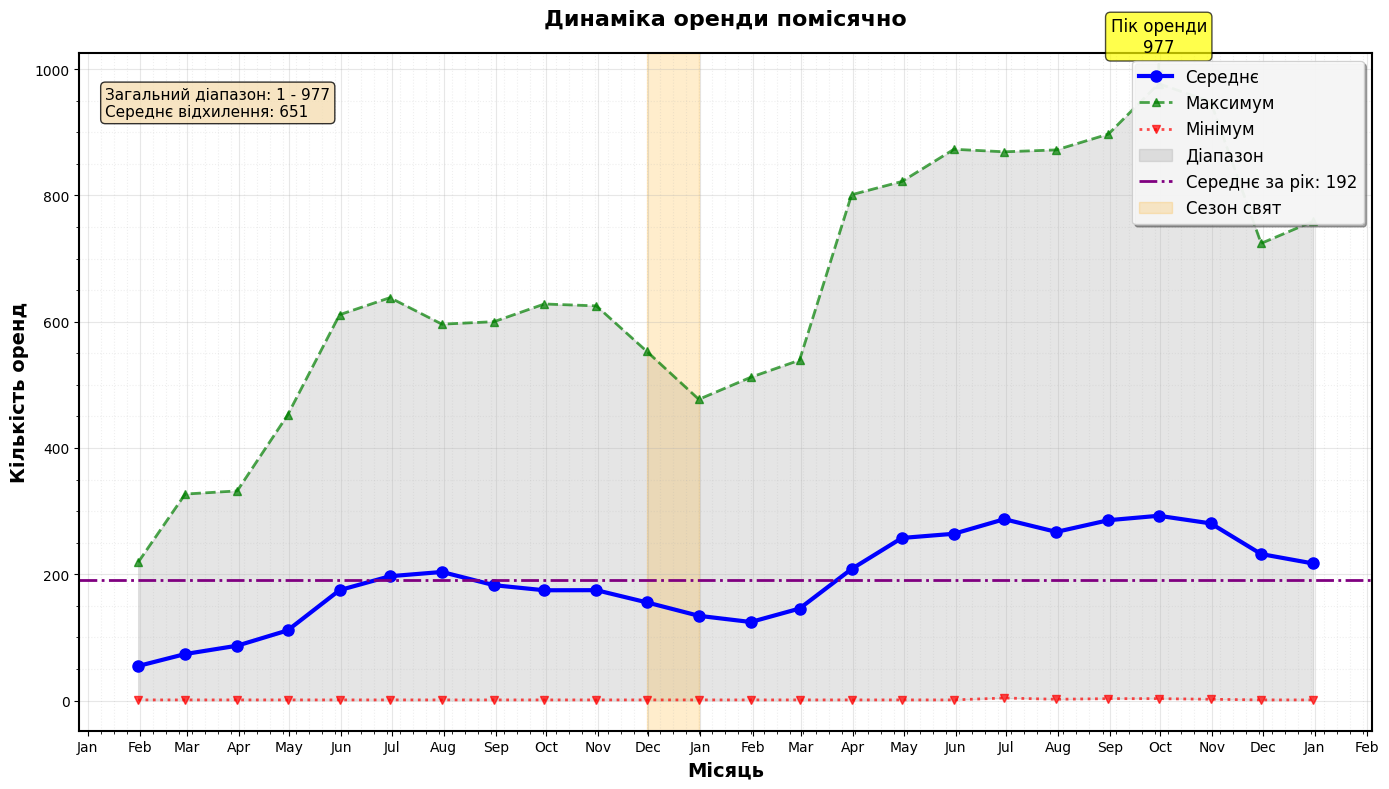

In [80]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 8))

# Малюємо лінії з різними стилями
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між max та min (правильний синтаксис)
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'],
                alpha=0.2, color='gray', label='Діапазон')

# Додаємо анотації для екстремальних значень
max_idx = monthly_stats['max'].idxmax()
max_val = monthly_stats['max'].max()
ax.annotate(f'Пік оренди\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.set_title('Динаміка оренди помісячно',
             fontsize=16, fontweight='bold', pad=20)

# Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')

# Виділяємо зони (листопад-грудень)
if len(monthly_stats) >= 12:
    ax.axvspan(monthly_stats.index[10], monthly_stats.index[11], alpha=0.2,
               color='orange', label='Сезон свят')

# Покращуємо легенду
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Додаємо текст з додатковою статистикою
textstr = f'Загальний діапазон: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
textstr += f'Середнє відхилення: {(monthly_stats["max"] - monthly_stats["min"]).mean():.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


1. Анотації дозволяють одразу звернути увагу на критичні точки у даних - пікові або мінімальні значення, не змушуючи користувача самостійно аналізувати всі точки графіка.
2. fill_between() використовується для візуального відображення діапазону між мінімальними та максимальними значеннями. Це допомагає оцінити розкид та нестабільність даних у різні періоди та краще зрозуміти рівень коливань попиту.
3. Текстовий блок узагальнює ключові числові характеристики прямо на графіку та дозволяє швидко отримати основні статистики, що важливо для презентацій та звітів.